In [1]:
%load_ext autoreload
%autoreload 2

In [57]:
import torch
from torch.utils.data import DataLoader

import dismech_nn

In [58]:
rod_r = 0.001
rod_l = 0.1
E = 1e9

rho_metal = 7000
rho_fluid = 1000

r = torch.tensor([0.005, 0.025, 0.005], dtype=torch.float64)

eta = 1000


def get_sphere_mass(r, rho):
    return 4/3 * torch.pi * r ** 3 * rho


def get_gravity(r, rho_diff):
    return 4/3 * torch.pi * r ** 3 * rho_diff * 9.81


def get_viscous(r, eta):
    return -(6 * torch.pi * eta * r), -(6 * torch.pi * eta * r)


ms = get_sphere_mass(r, rho_metal)
g = get_gravity(r, rho_metal - rho_fluid)

my_mlp = dismech_nn.MLP(12, 6, dtype=torch.float64)

my_rod = dismech_nn.NeuralDiscereteElasticRod2D(rod_l, ms, my_mlp)

my_rod.add_constant_force(torch.zeros(len(r)), -g)    # gravity only in Y

my_rod.add_velocity_proportional_force(*get_viscous(r, eta))

In [59]:
my_rod.run_forward_profile()

-----------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-----------------------  ------------  ------------  ------------  ------------  ------------  ------------  
           aten::linear         6.03%       1.784ms        39.18%      11.593ms      57.963us           200  
            aten::addmm        12.55%       3.714ms        17.70%       5.237ms      26.187us           200  
              aten::div         3.43%       1.015ms         9.19%       2.721ms      27.207us           100  
           aten::matmul         2.87%     850.700us         9.18%       2.716ms      13.579us           200  
           aten::arange         4.34%       1.283ms         8.32%       2.462ms      12.312us           200  
                aten::t         4.11%       1.215ms         8.19%       2.424ms      12.122us           200  
          

In [60]:
sols = []

for i in range(4):
    sols.append(torch.load('data/example_{}.pt'.format(i)))

t = torch.linspace(0, 10, 1000)

train = torch.stack(sols[:3])
valid = torch.stack([sols[3]])

train_dataset = dismech_nn.HomogenousTensorDataset(t, train, 20)
valid_dataset = dismech_nn.HomogenousTensorDataset(t, valid, 1000)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=1, shuffle=True)

C:\Users\12345\AppData\Local\Temp\ipykernel_17736\179112582.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sols.append(torch.load('data/example_{}.pt'.format(i)))


In [61]:
dismech_nn.train_ode(my_rod, train_dataloader, valid_dataloader, 10, method='euler', options={'step_size':5e-5}, viz = False)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Training Batch:   0%|          | 0/46 [00:00<?, ?it/s]

Validation Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/10 - Training Loss: 2.2353141439131445e-06 Validation Loss: 1.642976376180467e-05


Training Batch:   0%|          | 0/46 [00:00<?, ?it/s]

Validation Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2/10 - Training Loss: 1.1533024838813224e-06 Validation Loss: 6.052311913223339e-06


Training Batch:   0%|          | 0/46 [00:00<?, ?it/s]

Validation Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3/10 - Training Loss: 6.908171719145923e-07 Validation Loss: 7.217947015083953e-06


Training Batch:   0%|          | 0/46 [00:00<?, ?it/s]

Validation Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4/10 - Training Loss: 6.23811659986166e-07 Validation Loss: 5.654288355361069e-06


Training Batch:   0%|          | 0/46 [00:00<?, ?it/s]

Validation Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5/10 - Training Loss: 6.026399653570302e-07 Validation Loss: 5.828845469329944e-06


Training Batch:   0%|          | 0/46 [00:00<?, ?it/s]

Validation Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6/10 - Training Loss: 5.620430745898944e-07 Validation Loss: 1.1228885341205887e-05


Training Batch:   0%|          | 0/46 [00:00<?, ?it/s]

Validation Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 7/10 - Training Loss: 5.416734360048012e-07 Validation Loss: 1.0527991429153327e-05


Training Batch:   0%|          | 0/46 [00:00<?, ?it/s]

Validation Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 8/10 - Training Loss: 5.35921917603305e-07 Validation Loss: 1.0233155285896624e-05


Training Batch:   0%|          | 0/46 [00:00<?, ?it/s]

Validation Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 9/10 - Training Loss: 5.332464677109045e-07 Validation Loss: 8.435620065240669e-06


Training Batch:   0%|          | 0/46 [00:00<?, ?it/s]

Validation Batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 10/10 - Training Loss: 5.427808950466475e-07 Validation Loss: 8.265378622911126e-06


In [62]:
torch.save(my_rod.state_dict(), 'der_nn_10.pt')

In [63]:
import torchdiffeq

In [64]:
sol = torchdiffeq.odeint_adjoint(my_rod, my_rod.at_rest() + torch.tensor([0., 0., 0., 0.003, 0., 0., 0., 0., 0., 0., 0., 0.]), t)

In [65]:
sol = sol.detach().permute(1, 0)

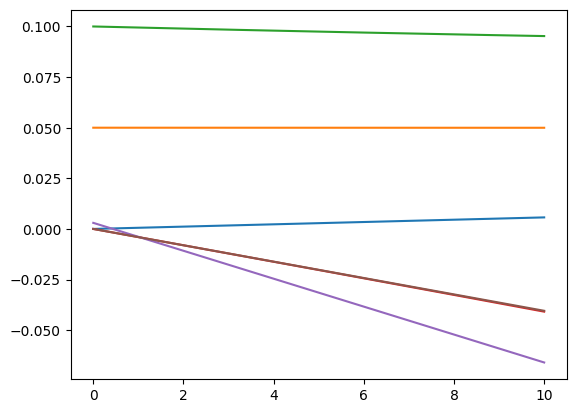

In [66]:
import matplotlib.pyplot as plt

plt.plot(t, sol[0])
plt.plot(t, sol[2])
plt.plot(t, sol[4])

plt.plot(t, sol[1])
plt.plot(t, sol[3])
plt.plot(t, sol[5])

MovieWriter ffmpeg unavailable; using Pillow instead.


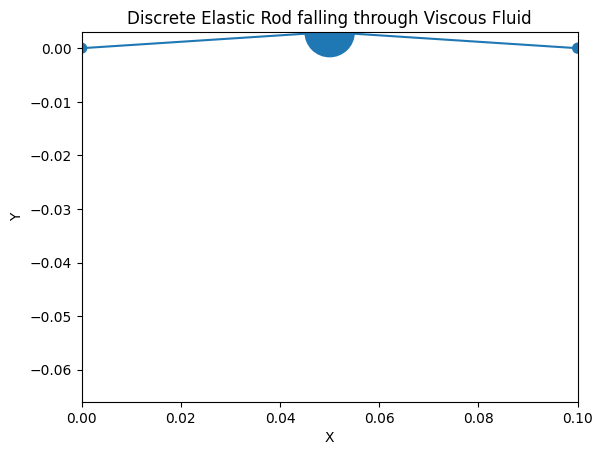

In [67]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation
from IPython.display import HTML

def get_der_animation(t, sol, r, frame_delay = 50, min_area = 10):
    time_step = int((t[1] - t[0]) * 1000)
    spf = int(frame_delay / time_step)
    N = int(len(sol) / 2)

    x_max = torch.max(sol[::2])
    x_min = torch.min(sol[::2])

    y_max = torch.max(sol[1::2])
    y_min = torch.min(sol[1::2])

    fig = plt.figure()
    ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max))
    ax.set_title("Discrete Elastic Rod falling through Viscous Fluid")
    ax.set_ylabel("Y")
    ax.set_xlabel("X")

    a = torch.pi * r ** 2
    a *= 50 / torch.min(a)

    line, = ax.plot([], [])
    scatter = ax.scatter([0 for _ in range(int(len(sol) / 2))], [0 for _ in range(int(len(sol) / 2))], s=a.int(), marker='o')

    def update(frame):
        x = []
        y = []

        for node in torch.split(sol, 2):
            x.append(node[0][frame * spf])
            y.append(node[1][frame * spf])
        line.set_data(x, y)
        scatter.set_offsets(torch.stack([torch.stack(x), torch.stack(y)]).permute(1,0))
        return line,

    return animation.FuncAnimation(fig, update, frames=int(len(t) / spf), interval=frame_delay)

ani = get_der_animation(t, sol[:int(len(sol)/2)], r)
ani.save('nn.gif')

In [68]:
rod_r = 0.001
rod_l = 0.1
E = 1e9

rho_metal = 7000
rho_fluid = 1000

r = torch.tensor([0.005, 0.025, 0.005], dtype=torch.float64)

eta = 1000


def get_sphere_mass(r, rho):
    return 4/3 * torch.pi * r ** 3 * rho


def get_gravity(r, rho_diff):
    return 4/3 * torch.pi * r ** 3 * rho_diff * 9.81


def get_viscous(r, eta):
    return -(6 * torch.pi * eta * r), -(6 * torch.pi * eta * r)


ms = get_sphere_mass(r, rho_metal)
g = get_gravity(r, rho_metal - rho_fluid)

a = dismech_nn.DiscreteElasticRod2D(rod_l, rod_r, E, ms)

a.add_constant_force(torch.zeros(len(r)), -g)    # gravity only in Y

a.add_velocity_proportional_force(*get_viscous(r, eta))

In [69]:
truth_sol = torchdiffeq.odeint_adjoint(a, a.at_rest() + torch.tensor([0., 0., 0., 0.003, 0., 0., 0., 0., 0., 0., 0., 0.]), t)

In [70]:
truth_sol = truth_sol.detach().permute(1,0)
error = truth_sol - sol

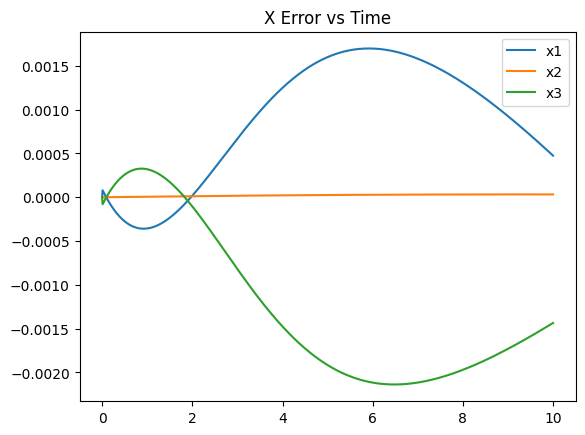

In [71]:
plt.plot(t, error[0], label='x1')
plt.plot(t, error[2], label='x2')
plt.plot(t, error[4], label='x3')
plt.title('X Error vs Time')
plt.legend()
plt.show()

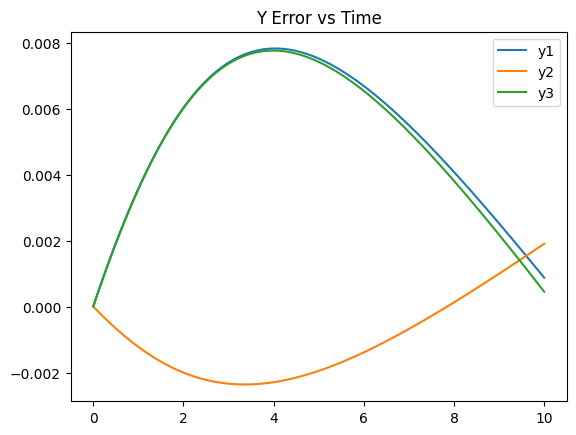

In [72]:
plt.plot(t, error[1], label='y1')
plt.plot(t, error[3], label='y2')
plt.plot(t, error[5], label='y3')
plt.title('Y Error vs Time')
plt.legend()
plt.show()